In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Time series: descriptive statistics and smoothing

`daily_stock[]` is an array of 124 stock prices, each sampled at the beginning of the day. This is a multi-part problem about computing descriptive statistics of times series, interpolation, and smoothing.

In [3]:
daily_stock = np.array([4012.32, 3991.05, 3997.34, 4079.09, 4090.41, 4147.60, 4136.13, 4137.29, 4090.46, 4081.50, 4117.86, 4164.00, 4111.08, 4136.48, 4179.76, 4119.21, 4076.60, 4017.77, 4070.56, 4060.43, 4016.22, 4016.95, 4019.81, 3972.61, 3898.85, 3928.86, 3990.97, 3999.09, 3983.17, 3969.61, 3919.25, 3892.09, 3895.08, 3808.10, 3852.97, 3824.14, 3839.50, 3849.28, 3783.22, 3829.25, 3844.82, 3822.39, 3878.44, 3821.62, 3817.66, 3852.36, 3895.75, 3995.32, 4019.65, 3990.56, 3934.38, 3963.51, 3933.92, 3941.26, 3998.84, 4071.70, 4076.57, 4080.11, 3957.63, 3963.94, 4026.12, 4027.26, 4003.58, 3949.94, 3965.34, 3946.56, 3958.79, 3991.73, 3957.25, 3992.93, 3956.37, 3748.57, 3828.11, 3806.80, 3770.55, 3719.89, 3759.69, 3856.10, 3871.98, 3901.06, 3807.30, 3830.60, 3859.11, 3797.34, 3752.75, 3665.78, 3695.16, 3719.98, 3677.95, 3583.07, 3669.91, 3577.03, 3588.84, 3612.39, 3639.66, 3744.52, 3783.28, 3790.93, 3678.43, 3585.62, 3640.47, 3719.04, 3647.29, 3655.04, 3693.23, 3757.99, 3789.93, 3855.93, 3899.89, 3873.33, 3901.35, 3946.01, 3932.69, 4110.41, 4067.36, 4006.18, 3979.87, 3908.19, 3924.26, 3966.85, 3955.00, 3986.16, 4030.61, 4057.66,
])

## 1: Mean and variance

Compute the mean and variance of the whole time series (without using `np.mean()` or `np.var()`)

In [4]:
def mean(X):
    return np.sum(X)/len(X)

In [5]:
def var(X):
    m = mean(X)
    return mean((X - m)**2)

## 2: Windowed mean and variance

Write a function that takes a one-dimensional array, a start index, and an end index, and returns the mean and variance of the part of the array inside the window. The window includes the start and end index. You can assume the indices are valid and in the right order.

In [6]:
def win_mean_var(X, start_i, end_i):
    return mean(X[start_i:end_i+1]), var(X[start_i:end_i+1])

## 3: Smoothing with Moving average

Write a function that takes a one-dimensional array `X[]` and a window width `width`, and returns the arrays of windowed means and variances. The `i`th output element is based on `width` *previous* elements of `X[]` (not looking into the future, up to *and including* index `i`). That is, `mean[i]` is the mean of `X[i-width...i]`. Return arrays of the same length as `X[]`; at the beginning of `X[]`, before `width` samples are available, `mean[i]` uses `X[0...i]` (same for variance).

e.g. given this array `[0, 1, 2, 3]` and the `width` of 2, the return `mean` array should look like this `[mean([0]), mean([0, 1]), mean([1, 2]), mean([2, 3])` The return `variance` array should look like this `[var([0]), var([0, 1]), var([1, 2]), var([2, 3])]`

You can assume the width is always less than or equal to the lengh of the given array 

In [7]:
def sliding_mean_var(X, width):
    M = np.empty_like(X)
    M[0] = X[0]
    V = np.empty_like(X)
    V[0] = 0
    for i in range(width):
        M[i] = mean(X[:i+1])
        V[i] = var(X[:i+1])
    for i in range(width, len(X)):
        M[i] = M[i-1] + (X[i] - X[i-width]) / width
        V[i] = V[i-1] + ((X[i] - M[i])**2 - (X[i-width] - M[i-width])**2)/width
    V[0] = V[1]
    return M, V

In [8]:
# Another solution
def sliding_mean_var(X, width):
    M = np.empty_like(X)
    V = np.empty_like(X)
    for i in range(width):
        M[i] = mean(X[:i+1])
        V[i] = var(X[:i+1])
    for i in range(width, len(X)):
        M[i] = mean(X[i-width+1:i+1])
        V[i] = var(X[i-width+1:i+1])
    return M, V

## 4: Plot

Plot the raw stock prices along with a smoothed version based on seven previous days of prices. To show which days have unusual stock prices, plot curves one standard deviation above and below the smoothed prices.

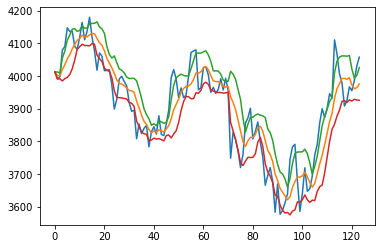

In [9]:
Mu, V = sliding_mean_var(daily_stock, 7)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(daily_stock)
ax.plot(Mu)
ax.plot(Mu + np.sqrt(V))
ax.plot(Mu - np.sqrt(V))